In [ ]:
from google.colab import files
Files=files.upload()

Saving Data_FlatPricing.xlsx to Data_FlatPricing.xlsx


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
Data = pd.read_excel('Data_FlatPricing.xlsx')

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25.0,Delhi
1,1300,2,30.0,Mumbai
2,1350,3,38.0,Kolkata
3,1800,3,51.0,Hyderabad
4,1500,2,35.0,Delhi
5,1400,3,39.0,Kolkata
6,1000,2,18.0,Mumbai
7,2050,4,65.0,Hyderabad
8,2000,3,55.0,Delhi
9,2400,3,60.0,Kolkata


In [ ]:
Data=Data.dropna()

In [ ]:
data=Data.drop_duplicates()

In [ ]:
Data=Data.reset_index()

In [ ]:
import numpy as np
Q1 = np.percentile(Data["Price"], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(Data["Price"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR

<ipython-input-7-262e7510e135>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Data["Price"], 25,
<ipython-input-7-262e7510e135>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Data["Price"], 75,


In [ ]:
Data

,index,Area,BHK,Price,City
0,0,1200,2,25.0,Delhi
1,1,1300,2,30.0,Mumbai
2,2,1350,3,38.0,Kolkata
3,3,1800,3,51.0,Hyderabad
4,4,1500,2,35.0,Delhi
5,5,1400,3,39.0,Kolkata
6,6,1000,2,18.0,Mumbai
7,7,2050,4,65.0,Hyderabad
8,8,2000,3,55.0,Delhi
9,9,2400,3,60.0,Kolkata


In [ ]:
OutlierList=[]
for i in range (Data["Price"].shape[0]):
  if Data["Price"][i]>=UpperLimit:
    OutlierList.append(i)
  elif Data["Price"][i]<=LowerLimit:
    OutlierList.append(i)
print(OutlierList)

[28]


In [ ]:
Data=Data.drop(OutlierList)

In [ ]:
Data=pd.get_dummies(Data, columns=['City'], drop_first=True)

In [ ]:
Data

,index,Area,BHK,Price,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,1200,2,25.0,0,0,0
1,1,1300,2,30.0,0,0,1
2,2,1350,3,38.0,0,1,0
3,3,1800,3,51.0,1,0,0
4,4,1500,2,35.0,0,0,0
5,5,1400,3,39.0,0,1,0
6,6,1000,2,18.0,0,0,1
7,7,2050,4,65.0,1,0,0
8,8,2000,3,55.0,0,0,0
9,9,2400,3,60.0,0,1,0


In [ ]:
Data=pd.DataFrame(Data)

In [ ]:
Y=Data ['Price']
X=Data[['Area', 'BHK', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai']]

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm
MLR=sm.OLS(Y_train,X_train).fit()
print (MLR.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1352.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    1.79e-21
Time:                        03:57:43   Log-Likelihood:                         -55.774
No. Observations:                  22   AIC:                                      121.5
Df Residuals:                      17   BIC:                                      127.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
import numpy as np

#calculate sse
sse_5 = np.sum((MLR.fittedvalues - Data.Price)**2)
print(sse_5)

501.791504424779


In [ ]:
Y=Data ['Price']
X=Data[['Area', 'BHK', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai']]
import statsmodels.api as sm
MLR=sm.OLS(Y,X).fit()
print (MLR.summary())

sse_5 = np.sum((MLR.fittedvalues - Data.Price)**2)
print(sse_5)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1685.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                    1.08e-28
Time:                        04:05:13   Log-Likelihood:                         -72.236
No. Observations:                  28   AIC:                                      154.5
Df Residuals:                      23   BIC:                                      161.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
Y_pred=MLR.predict(X_test)

NameError: ignored

In [ ]:
Y_pred

9     63.143317
25    75.794462
8     53.942484
21    79.590673
0     32.894712
12    59.693004
dtype: float64

In [ ]:
Residual=Y_test-Y_pred

In [ ]:
Y_test

9     60.0
25    74.0
8     55.0
21    80.0
0     25.0
12    63.0
Name: Price, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

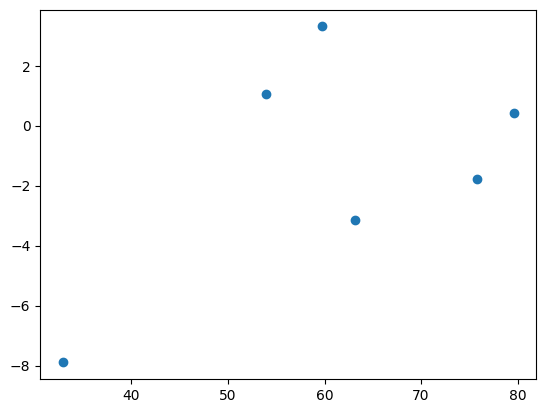

In [ ]:
plt.scatter(Y_pred,Residual)

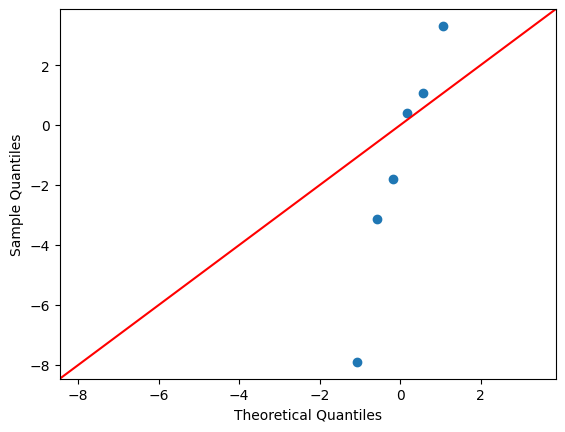

In [ ]:
import numpy as np
import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code
# the graph look different than shown below.

# Random data points generated


sm.qqplot(Residual, line ='45')
py.show()

In [ ]:
X=Data[['Area', 'BHK',  'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai']]

In [ ]:
X.corr()

,Area,BHK,City_Hyderabad,City_Kolkata,City_Mumbai
Area,1.000000,0.597119,0.342300,-0.110233,-0.012895
BHK,0.597119,1.000000,0.309152,0.044346,0.122910
City_Hyderabad,0.342300,0.309152,1.000000,-0.258199,-0.330289
City_Kolkata,-0.110233,0.044346,-0.258199,1.000000,-0.213201
City_Mumbai,-0.012895,0.122910,-0.330289,-0.213201,1.000000


Droping NA Values

Dropping Dupplicates

In [ ]:
Data=Data.drop_duplicates()

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25.0,Delhi
1,1300,2,30.0,Mumbai
2,1350,3,38.0,Kolkata
3,1800,3,51.0,Hyderabad
4,1500,2,35.0,Delhi
5,1400,3,39.0,Kolkata
6,1000,2,18.0,Mumbai
7,2050,4,65.0,Hyderabad
8,2000,3,55.0,Delhi
9,2400,3,60.0,Kolkata


Dropping Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7beac4185510>,
 'caps': [<matplotlib.lines.Line2D at 0x7beac4185a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7beac4185270>],
 'medians': [<matplotlib.lines.Line2D at 0x7beac4185f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7beac4186230>],
 'means': []}

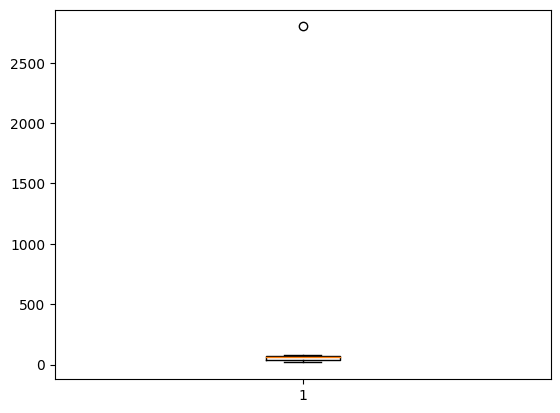

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(Data["Price"])

In [ ]:
Data["Area"]

0     1200
1     1300
2     1350
3     1800
4     1500
5     1400
6     1000
7     2050
8     2000
9     2400
10    2450
11    2300
12    2250
13    2350
14    2700
15    2750
16    2800
17    3000
18    3100
19    2950
20    3100
25    1000
28    1200
30    1000
Name: Area, dtype: int64

In [ ]:
Data=Data.reset_index()

In [ ]:
Data["Price"][23]

2800.0

In [ ]:
OutlierList=[]
for i in range (Data["Price"].shape[0]):
  if Data["Price"][i]>=500:
    OutlierList.append(i)
print(OutlierList)

KeyError: ignored

In [ ]:
Data=Data.drop(OutlierList)

Box-plot based approach

In [ ]:
import numpy as np
Q1 = np.percentile(Data["Price"], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(Data["Price"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR



<ipython-input-27-2a9bfa16389a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Data["Price"], 25,
<ipython-input-27-2a9bfa16389a>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Data["Price"], 75,


In [ ]:
OutlierList=[]
for i in range (Data["Price"].shape[0]):
  if Data["Price"][i]>=UpperLimit:
    OutlierList.append(i)
  elif Data["Price"][i]<=LowerLimit:
    OutlierList.append(i)
print(OutlierList)

[23]


In [ ]:
Data=Data.drop(OutlierList)

Dummy Variable

In [ ]:
Data = pd.get_dummies(Data, columns = ['City'], drop_first=False)

In [ ]:
Data

,index,Area,BHK,Price,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,1200,2,25.0,1,0,0,0
1,1,1300,2,30.0,0,0,0,1
2,2,1350,3,38.0,0,0,1,0
3,3,1800,3,51.0,0,1,0,0
4,4,1500,2,35.0,1,0,0,0
5,5,1400,3,39.0,0,0,1,0
6,6,1000,2,18.0,0,0,0,1
7,7,2050,4,65.0,0,1,0,0
8,8,2000,3,55.0,1,0,0,0
9,9,2400,3,60.0,0,0,1,0


In [ ]:
Y=Data["Price"]
X=Data[["Area", "BHK"]]

In [ ]:
from statsmodels.formula.api import ols
MLR=ols("Y~X", Data).fit()
print (MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     540.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           3.90e-18
Time:                        03:22:57   Log-Likelihood:                -54.896
No. Observations:                  23   AIC:                             115.8
Df Residuals:                      20   BIC:                             119.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5213      2.778     -4.867      0.0

In [ ]:
import pandas as pd
Data=pd.read_excel("Data_FlatPricing (1).xlsx")

FileNotFoundError: ignored

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25.0,Delhi
1,1300,2,30.0,Mumbai
2,1350,3,38.0,Kolkata
3,1800,3,51.0,Hyderabad
4,1500,2,35.0,Delhi
5,1400,3,39.0,Kolkata
6,1000,2,18.0,Mumbai
7,2050,4,65.0,Hyderabad
8,2000,3,55.0,Delhi
9,2400,3,60.0,Kolkata


In [ ]:
Data=Data.dropna()

In [ ]:
#Data=Data.reset_index()

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25.0,Delhi
1,1300,2,30.0,Mumbai
2,1350,3,38.0,Kolkata
3,1800,3,51.0,Hyderabad
4,1500,2,35.0,Delhi
5,1400,3,39.0,Kolkata
6,1000,2,18.0,Mumbai
7,2050,4,65.0,Hyderabad
8,2000,3,55.0,Delhi
9,2400,3,60.0,Kolkata


In [ ]:
Data = Data.drop_duplicates(keep='first')

In [ ]:
Data

,Area,BHK,Price,City
0,1200,2,25.0,Delhi
1,1300,2,30.0,Mumbai
2,1350,3,38.0,Kolkata
3,1800,3,51.0,Hyderabad
4,1500,2,35.0,Delhi
5,1400,3,39.0,Kolkata
6,1000,2,18.0,Mumbai
7,2050,4,65.0,Hyderabad
8,2000,3,55.0,Delhi
9,2400,3,60.0,Kolkata


In [ ]:
Y=Data["Price"]
X=Data[["Area"]]

In [ ]:
from statsmodels.formula.api import ols
MLR= ols("Y~X", Data).fit()
# Print the summary
#print(MLR.summary())


## Dummy Variable
## One Hot Encoding

In [ ]:
CatVar =  ["Swimming Pool"]
Data = pd.get_dummies(Data, columns = CatVar, drop_first=False)

NameError: ignored

In [ ]:
Data




,Area,BHK,Distance from Hospital,Distance from School,City,Price,Swimming Pool_No,Swimming Pool_yes
0,1200,2,7,11,Delhi,25,1,0
1,1300,2,4,8,Mumbai,30,1,0
2,1350,3,6,10,Kolkata,38,0,1
3,1800,3,7,1,Hyderabad,51,0,1
4,1500,2,6,12,Delhi,35,1,0
5,1400,3,1,4,Kolkata,39,1,0
6,1000,2,5,11,Mumbai,18,1,0
7,2050,4,3,13,Hyderabad,65,0,1
8,2000,3,1,7,Delhi,55,1,0
9,2400,3,7,9,Kolkata,60,1,0


In [ ]:
B=Data["Price"]
print (B.shape[0])

23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


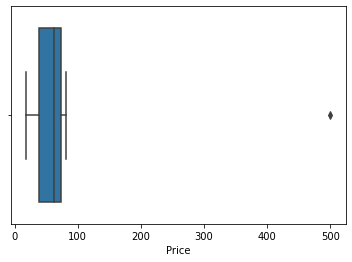

In [ ]:
import seaborn as sns
sns.boxplot(B)

In [ ]:
Drop=[]
for i in range (B.shape[0]):
  if B[i]>=300:
    #print (i)
    Drop.append(i)
print (Drop)
#Data = Data.drop(labels=Drop, axis=0)
print (Data)

[21]
    Area  BHK  Distance from Hospital  Distance from School  Price  \
0   1200    2                       7                    11     25   
1   1300    2                       4                     8     30   
2   1350    3                       6                    10     38   
3   1800    3                       7                     1     51   
4   1500    2                       6                    12     35   
5   1400    3                       1                     4     39   
6   1000    2                       5                    11     18   
7   2050    4                       3                    13     65   
8   2000    3                       1                     7     55   
9   2400    3                       7                     9     60   
10  2450    4                       1                    10     70   
11  2300    4                       4                     6     66   
12  2250    3                       1                     3     63   
13  2350    4  

In [ ]:
CatVar =  ["Swimming Pool", "City"]
Data = pd.get_dummies(Data, columns = CatVar, drop_first=False)
Data

KeyError: ignored

In [ ]:
Drop=[]
for i in range (B.shape[0]):
  if B[i]>=300:
    #print (i)
    Drop.append(i)
print (Drop)
Data = Data.drop(labels=Drop, axis=0)
print (Data)

[21]
    Area  BHK  Distance from Hospital  Distance from School  Price  \
0   1200    2                       7                    11     25   
1   1300    2                       4                     8     30   
2   1350    3                       6                    10     38   
3   1800    3                       7                     1     51   
4   1500    2                       6                    12     35   
5   1400    3                       1                     4     39   
6   1000    2                       5                    11     18   
7   2050    4                       3                    13     65   
8   2000    3                       1                     7     55   
9   2400    3                       7                     9     60   
10  2450    4                       1                    10     70   
11  2300    4                       4                     6     66   
12  2250    3                       1                     3     63   
13  2350    4  

In [ ]:
Y=Data["Price"]
X=Data[["Area", "City_Hyderabad", "City_Kolkata", "City_Mumbai"]]

In [ ]:
from statsmodels.formula.api import ols
MLR= ols("Y~X", Data).fit()
# Print the summary
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.36e-12
Time:                        12:20:22   Log-Likelihood:                -59.496
No. Observations:                  22   AIC:                             129.0
Df Residuals:                      17   BIC:                             134.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9156      3.133     -1.569      0.1

In [ ]:
A=Data["Area"]
B=Data["Price"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


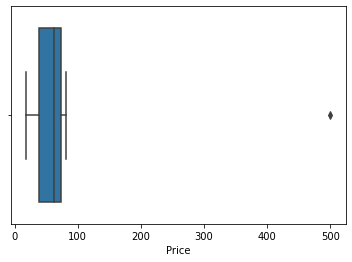

In [ ]:
import seaborn as sns
sns.boxplot(B)

In [ ]:
Drop=[]
for i in range (Y.shape[0]):
  if Y[i]>=300:
    print (i)
    Drop.append(i)
Data = Data.drop(labels=Drop, axis=0)
print (Data)

21
    Area  BHK  Distance from Hospital  Distance from School  Price  \
0   1200    2                       7                    11     25   
1   1300    2                       4                     8     30   
2   1350    3                       6                    10     38   
3   1800    3                       7                     1     51   
4   1500    2                       6                    12     35   
5   1400    3                       1                     4     39   
6   1000    2                       5                    11     18   
7   2050    4                       3                    13     65   
8   2000    3                       1                     7     55   
9   2400    3                       7                     9     60   
10  2450    4                       1                    10     70   
11  2300    4                       4                     6     66   
12  2250    3                       1                     3     63   
13  2350    4    

In [ ]:
Y=Data["Price"]
X=Data[["Area","City_Hyderabad", "City_Delhi", "City_Kolkata"]]

In [ ]:
from statsmodels.formula.api import ols
MLR= ols("Y~X", Data).fit()
# Print the summary
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.36e-12
Time:                        11:21:24   Log-Likelihood:                -59.496
No. Observations:                  22   AIC:                             129.0
Df Residuals:                      17   BIC:                             134.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0849      3.315     -0.931      0.3

In [ ]:
#bool_series = pd.isnull(Data["Area"])
#bool_series

In [ ]:
##Droping the rows with with Nan values
#Drop=[]
#print (Data.shape[0])
#for i in range (Data.shape[0]):
  #if bool_series[i]==True:
   #Drop.append(i)
#print (Drop)

In [ ]:
# Removing duplicates if there exist
#N_dupli = sum(Data.duplicated(keep='first'))
#Data = Data.drop_duplicates(keep='first').reset_index(drop=True)
#print("The dataset contains {} duplicates".format(N_dupli))

In [ ]:
#Droping the row
#Data = Data.drop(labels=Drop, axis=0)
#print (Data)

In [ ]:
Data2

,Area,BHK,Distance from Hospital,Distance from School,Price,City_Hyderabad,City_Kolkata,City_Mumbai,Swimming Pool_yes
0,1200,2,7,11,25,0,0,0,0
1,1300,2,4,8,30,0,0,1,0
4,1500,2,6,12,35,0,0,0,0
6,1000,2,5,11,18,0,0,1,0
20,1100,2,9,12,25,0,0,0,0


In [ ]:
X=Data[["Area", "BHK", "Distance from Hospital", "Distance from School", "City_Hyderabad", "City_Kolkata", "City_Mumbai","Swimming Pool_yes"]]
X

,Area,BHK,Distance from Hospital,Distance from School,City_Hyderabad,City_Kolkata,City_Mumbai,Swimming Pool_yes
0,1200,2,7,11,0,0,0,0
1,1300,2,4,8,0,0,1,0
2,1350,3,6,10,0,1,0,1
3,1800,3,7,1,1,0,0,1
4,1500,2,6,12,0,0,0,0
5,1400,3,1,4,0,1,0,0
6,1000,2,5,11,0,0,1,0
7,2050,4,3,13,1,0,0,1
8,2000,3,1,7,0,0,0,0
9,2400,3,7,9,0,1,0,0


In [ ]:
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR



In [ ]:
Drop1=[]
for i in range (Y.shape[0]):
  if Y[i]==1000:
    print (i)
    Drop.append(i)
Data=Data1
Data = Data.drop(labels=Drop, axis=0)
print (Data)

KeyError: ignored

In [ ]:
X=Data[["Area", "BHK", "Distance from Hospital", "Distance from School", "City_Hyderabad", "City_Kolkata", "City_Mumbai","Swimming Pool_yes"]]
X

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X", Data).fit()
# Print the summary
print(model.summary())



NameError: ignored

Stepwise Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
Files=files.upload()

Saving Data_FlatPricing9.xlsx to Data_FlatPricing9 (1).xlsx


In [ ]:
Data=pd.read_excel("Data_FlatPricing9 (1).xlsx")
print (Data)

    Area  BHK  Distance from Hospital  Distance from School       City  \
0   1200    2                       7                    11      Delhi   
1   1300    2                       4                     8     Mumbai   
2   1350    3                       6                    10    Kolkata   
3   1800    3                       7                     1  Hyderabad   
4   1500    2                       6                    12      Delhi   
5   1400    3                       1                     4    Kolkata   
6   1000    2                       5                    11     Mumbai   
7   2050    4                       3                    13  Hyderabad   
8   2000    3                       1                     7      Delhi   
9   2400    3                       7                     9    Kolkata   
10  2450    4                       1                    10  Hyderabad   
11  2300    4                       4                     6     Mumbai   
12  2250    3                       1 

In [ ]:
CatVar =  ["Swimming Pool", "City"]
Data = pd.get_dummies(Data, columns = CatVar, drop_first=True)


KeyError: ignored

In [ ]:
Data.head(3)

,Area,BHK,Distance from Hospital,Distance from School,Price,Swimming Pool_yes,City_Hyderabad,City_Kolkata,City_Mumbai
0,1200,2,7,11,25,0,0,0,0
1,1300,2,4,8,30,0,0,0,1
2,1350,3,6,10,38,1,0,1,0


In [ ]:
Y=Data["Price"]

In [ ]:
Drop=[]
for i in range (Y.shape[0]):
  if Y[i]>=400:
    print (i)
    Drop.append(i)
Data = Data.drop(labels=Drop, axis=0)
print (Data)

21
    Area  BHK  Distance from Hospital  Distance from School  Price  \
0   1200    2                       7                    11     25   
1   1300    2                       4                     8     30   
2   1350    3                       6                    10     38   
3   1800    3                       7                     1     51   
4   1500    2                       6                    12     35   
5   1400    3                       1                     4     39   
6   1000    2                       5                    11     18   
7   2050    4                       3                    13     65   
8   2000    3                       1                     7     55   
9   2400    3                       7                     9     60   
10  2450    4                       1                    10     70   
11  2300    4                       4                     6     66   
12  2250    3                       1                     3     63   
13  2350    4    

In [ ]:
Y=Data["Price"]

In [ ]:
X=Data[["Area", "BHK"]]

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     622.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.84e-18
Time:                        14:15:33   Log-Likelihood:                -50.852
No. Observations:                  22   AIC:                             107.7
Df Residuals:                      19   BIC:                             111.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5867      2.389     -5.688      0.0

In [ ]:
y_pred=model.predict(X)
y_pred

0     27.409202
1     29.676148
2     37.705909
3     47.907163
4     34.210038
5     38.839382
6     22.875312
7     60.470816
8     52.441054
9     61.508836
10    69.538597
11    66.138179
12    58.108418
13    67.271652
14    68.309672
15    76.339433
16    70.576617
17    82.006797
18    84.273742
19    73.977035
20    25.142257
22    84.273742
dtype: float64

In [ ]:
Residual=y_pred-Y
Residual

0     2.409202
1    -0.323852
2    -0.294091
3    -3.092837
4    -0.789962
5    -0.160618
6     4.875312
7    -4.529184
8    -2.558946
9     1.508836
10   -0.461403
11    0.138179
12   -4.891582
13    4.271652
14   -1.690328
15    0.339433
16   -1.423383
17    2.006797
18    2.273742
19   -0.022965
20    0.142257
22    2.273742
dtype: float64

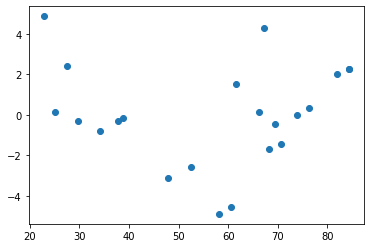

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, Residual)

In [ ]:
Y=Data["Price"]
X=Data[["Area", "BHK", "Distance from Hospital", "Distance from School", "Swimming Pool_yes"]]

KeyError: ignored

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X1", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     283.1
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.74e-14
Time:                        08:43:35   Log-Likelihood:                -44.372
No. Observations:                  21   AIC:                             100.7
Df Residuals:                      15   BIC:                             107.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9822      3.219     -2.480      0.0

In [ ]:
X2=Data[["Area", "BHK", "Distance from Hospital", "Distance from School"]]

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X2", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     360.9
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.86e-15
Time:                        08:43:35   Log-Likelihood:                -44.837
No. Observations:                  21   AIC:                             99.67
Df Residuals:                      16   BIC:                             104.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9988      2.943     -3.058      0.0

In [ ]:
X3=Data[["Area", "BHK", "Distance from Hospital"]]

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X3", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     432.5
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           3.04e-16
Time:                        08:43:35   Log-Likelihood:                -46.572
No. Observations:                  21   AIC:                             101.1
Df Residuals:                      17   BIC:                             105.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7006      2.607     -4.488      0.0

In [ ]:
X4=Data[["Area", "BHK"]]

In [ ]:
#X4=Data[["Area", "BHK"]]
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X4", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           5.45e-17
Time:                        08:43:35   Log-Likelihood:                -48.537
No. Observations:                  21   AIC:                             103.1
Df Residuals:                      18   BIC:                             106.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.0304      2.444     -5.740      0.0

Outlier Detection and Removal


Linearity Assumption

In [ ]:
#Residual VS Predicted

In [ ]:
X=Data["Area"]
Y=Data["Price"]

In [ ]:
Y=Data["Price"]

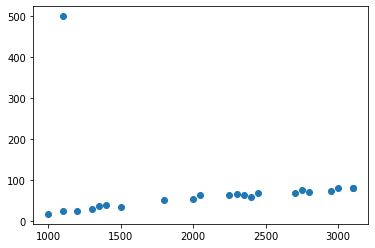

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [ ]:
Drop=[]
for i in range (Y.shape[0]):
  if Y[i]>=400:
    print (i)
    Drop.append(i)
Data = Data.drop(labels=Drop, axis=0)
print (Data)

21
    Area  BHK  Distance from Hospital  Distance from School       City  \
0   1200    2                       7                    11      Delhi   
1   1300    2                       4                     8     Mumbai   
2   1350    3                       6                    10    Kolkata   
3   1800    3                       7                     1  Hyderabad   
4   1500    2                       6                    12      Delhi   
5   1400    3                       1                     4    Kolkata   
6   1000    2                       5                    11     Mumbai   
7   2050    4                       3                    13  Hyderabad   
8   2000    3                       1                     7      Delhi   
9   2400    3                       7                     9    Kolkata   
10  2450    4                       1                    10  Hyderabad   
11  2300    4                       4                     6     Mumbai   
12  2250    3                      

In [ ]:
X=Data[["Area", "BHK"]]
X1=Data[["Area"]]
Y=Data["Price"]

In [ ]:
#import matplotlib.pyplot as pltb
#plt.scatter(X, Y)

In [ ]:
#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X", Data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     622.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.84e-18
Time:                        12:08:39   Log-Likelihood:                -50.852
No. Observations:                  22   AIC:                             107.7
Df Residuals:                      19   BIC:                             111.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5867      2.389     -5.688      0.0

In [ ]:
Y_Pred=model.predict(X)
Y_Pred

0     27.409202
1     29.676148
2     37.705909
3     47.907163
4     34.210038
5     38.839382
6     22.875312
7     60.470816
8     52.441054
9     61.508836
10    69.538597
11    66.138179
12    58.108418
13    67.271652
14    68.309672
15    76.339433
16    70.576617
17    82.006797
18    84.273742
19    73.977035
20    25.142257
22    84.273742
dtype: float64

In [ ]:
Residual=Y-Y_Pred
Residual

0    -2.409202
1     0.323852
2     0.294091
3     3.092837
4     0.789962
5     0.160618
6    -4.875312
7     4.529184
8     2.558946
9    -1.508836
10    0.461403
11   -0.138179
12    4.891582
13   -4.271652
14    1.690328
15   -0.339433
16    1.423383
17   -2.006797
18   -2.273742
19    0.022965
20   -0.142257
22   -2.273742
dtype: float64

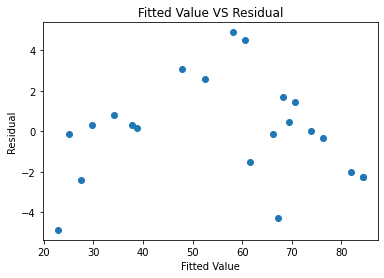

In [ ]:
#Testing linearity
plt.scatter(Y_Pred,Residual)
plt.title("Fitted Value VS Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

(array([2., 0., 4., 1., 3., 6., 2., 1., 1., 2.]),
 array([-4.87531168, -3.89862226, -2.92193285, -1.94524343, -0.96855401,
         0.00813541,  0.98482482,  1.96151424,  2.93820366,  3.91489308,
         4.89158249]),
 <a list of 10 Patch objects>)

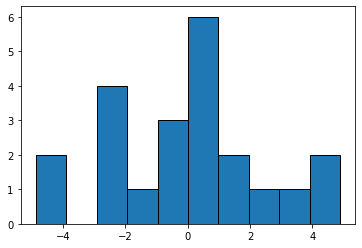

In [ ]:
#testing normality of errors
import matplotlib.pyplot as plt
plt.hist(Residual, edgecolor='black', bins=10)


In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code
# the graph look different than shown below.

# Random data points generated
data_points = [1,2,3,4,5,6,7,8,9]

sm.qqplot(data_points, line ='45')
py.show()

AttributeError: ignored

In [ ]:
#No Multicollinearity among Predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF = Data[["Area", "BHK", "Distance from Hospital", "Distance from School"]]
X_VIF

NameError: ignored

In [ ]:
corr = X_VIF.corr()
print (corr)

                            Area       BHK  Distance from Hospital  \
Area                    1.000000  0.756242               -0.088946   
BHK                     0.756242  1.000000               -0.180429   
Distance from Hospital -0.088946 -0.180429                1.000000   
Distance from School   -0.214271 -0.148430               -0.025758   

                        Distance from School  
Area                               -0.214271  
BHK                                -0.148430  
Distance from Hospital             -0.025758  
Distance from School                1.000000  


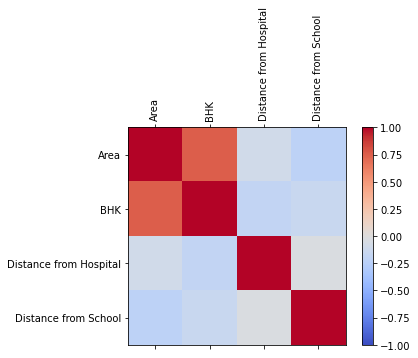

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_VIF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_VIF.columns)
ax.set_yticklabels(X_VIF.columns)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X_VIF = Data[["Area", "BHK", "Distance from Hospital", "Distance from School"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i)
                          for i in range(len(X_VIF.columns))]
print(vif_data)

                  feature        VIF
0                    Area  25.669023
1                     BHK  31.253465
2  Distance from Hospital   3.188686
3    Distance from School   4.480522


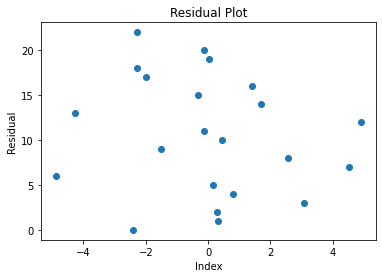

In [ ]:
#Homoscedasticity
plt.scatter(Residual,Residual.index)
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()


In [ ]:
#No Autocorrelation of the Error

#Durbin Watson test
#Idealy it should be in betwenn 1.5 to 2.5

#if durbinWatson < 1.5
#Signs of positive autocorrelation', '\n')


#if durbinWatson > 2.5:
#Signs of negative autocorrelation

#Anova Table
from statsmodels.formula.api import ols
model = ols("Y ~ X", Data).fit()
# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     622.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           4.84e-18
Time:                        12:25:53   Log-Likelihood:                -50.852
No. Observations:                  22   AIC:                             107.7
Df Residuals:                      19   BIC:                             111.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5867      2.389     -5.688      0.0

Exogeniety